In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
main_df = pd.read_csv('/content/loan_sanction_train.csv')

In [ ]:
main_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
main_df.shape

(614, 13)

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA analysis

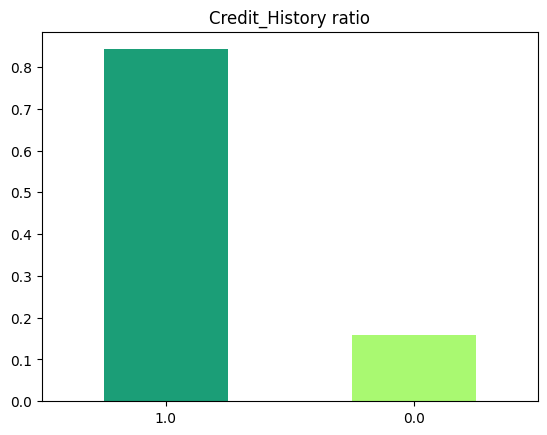

In [ ]:
main_df[~ main_df['Credit_History'].isna()]['Credit_History'].value_counts(normalize=True).plot.bar(color=['#1b9e77', '#a9f971'])
plt.title('Credit_History ratio')
plt.xticks(rotation=0)
plt.show()

We observe that over 80% of the data has previous credit history which is 475 in number and thos who dont have credit_history are 89.

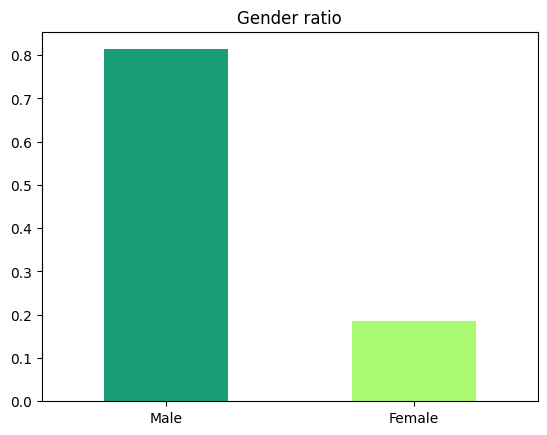

In [ ]:
main_df.Gender.value_counts(normalize=True).plot.bar(color=['#1b9e77', '#a9f971'])
plt.title('Gender ratio')
plt.xticks(rotation=0)
plt.show()

Around of 80% of them who applied for loan are Male which is 489 and 20% of them which accounts to 112 of them are Female

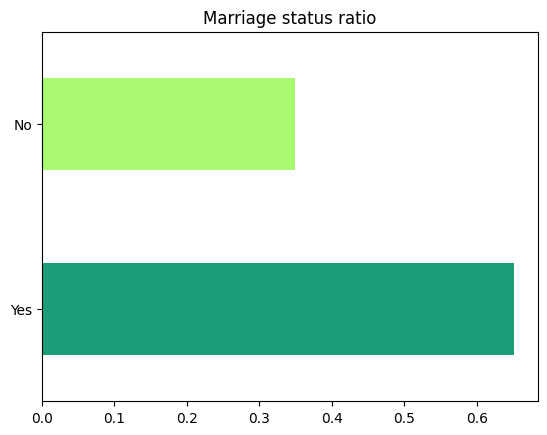

In [ ]:
main_df.Married.value_counts(normalize=True).plot.barh(color=['#1b9e77', '#a9f971'])
plt.title('Marriage status ratio')
plt.show()

Here, we can see that about more than 60% of the applicants are married.

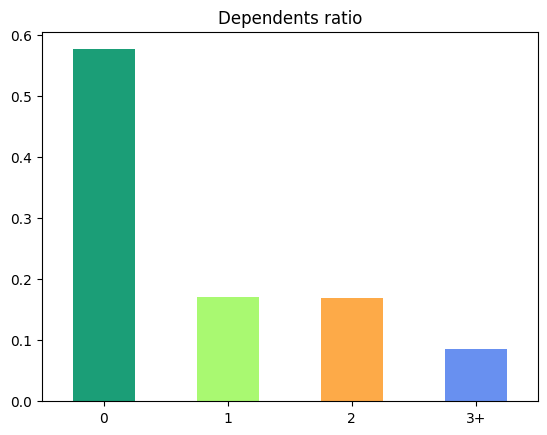

In [ ]:
main_df.Dependents.value_counts(normalize=True).plot.bar(color=['#1b9e77', '#a9f971','#fdaa48','#6890F0'])
plt.title('Dependents ratio')
plt.xticks(rotation=0)
plt.show()

from the above we say most of applicants dont have any dependents just less than 60%.

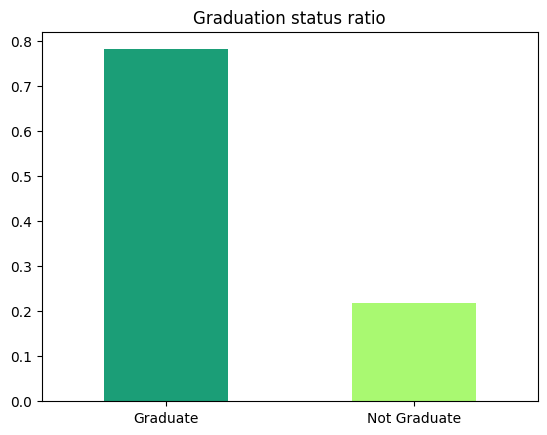

In [ ]:
main_df.Education.value_counts(normalize=True).plot.bar(color=['#1b9e77', '#a9f971'])
plt.title('Graduation status ratio')
plt.xticks(rotation=0)
plt.show()

About 80% of the applicants are Graduate.

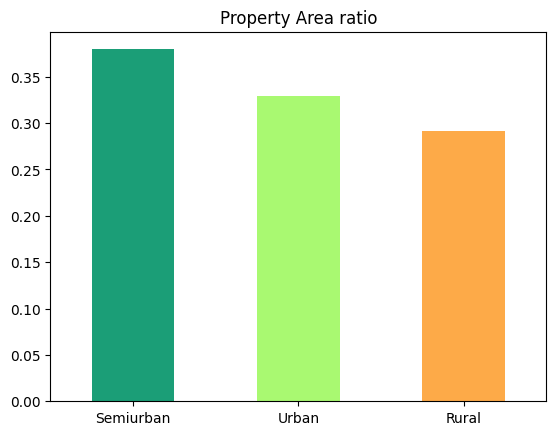

In [ ]:
main_df.Property_Area.value_counts(normalize=True).plot.bar(color=['#1b9e77', '#a9f971','#fdaa48'])
plt.title('Property Area ratio')
plt.xticks(rotation=0)
plt.show()

Most of the Applicants live in Semiurban and Urban areas compared to rural.

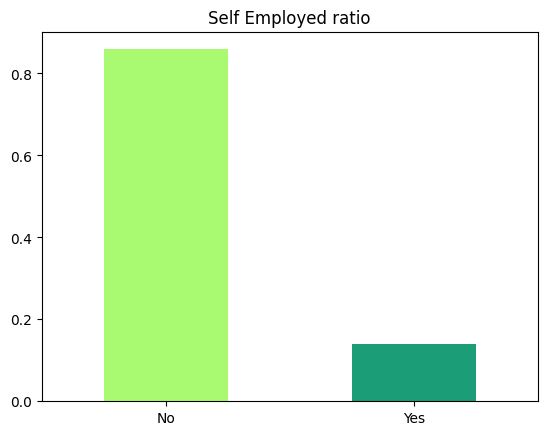

In [ ]:
main_df.Self_Employed.value_counts(normalize=True).plot.bar(color=['#a9f971','#1b9e77'])
plt.title('Self Employed ratio')
plt.xticks(rotation=0)
plt.show()

Most of the applicants about more than 85% are not Self Employed.

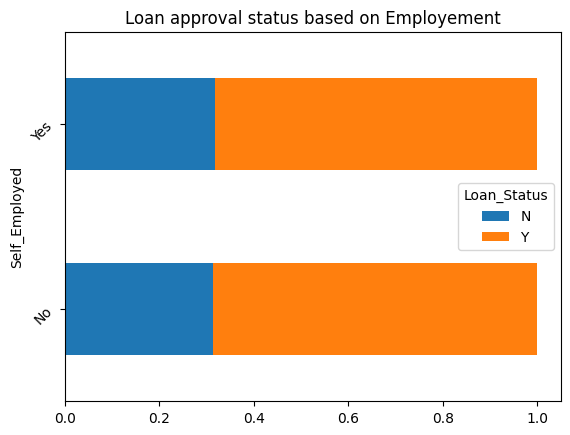

In [ ]:
main_df.groupby('Self_Employed')['Loan_Status'].value_counts(normalize=True).unstack('Loan_Status').plot.barh(stacked=True)
plt.title('Loan approval status based on Employement')
plt.yticks(rotation=45)
plt.show()

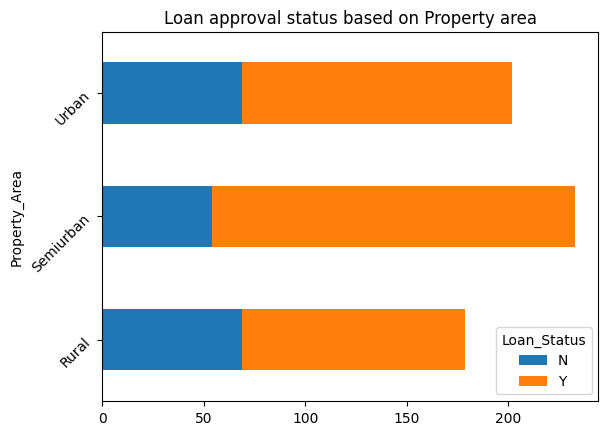

In [ ]:
main_df.groupby('Property_Area')['Loan_Status'].value_counts(normalize=False).unstack('Loan_Status').plot.barh(stacked=True)
plt.title('Loan approval status based on Property area')
plt.yticks(rotation=45)
plt.show()

- From above we can say that loan is approved discard of our area.
- There are more applications from Semiurban area.
- There could be a hypothesis that as a semiurban area it will have cheaper property rates than urban and are near to urban spaces for employement compared to rural areas, So thats why there are many applications from Semiurban than Urban or rural.

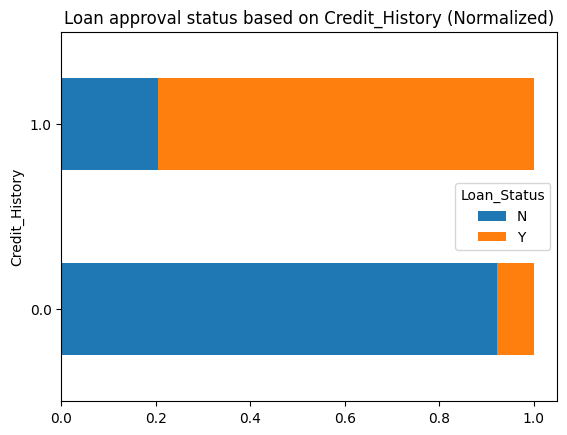

In [ ]:
main_df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack('Loan_Status').plot.barh(stacked=True)
plt.title('Loan approval status based on Credit_History (Normalized)')
plt.yticks(rotation=0)

plt.show()

- From the above we conclude that there is high chance of near about 80% to get loan approval if we have a Credit History.

- If we dont have a Credit History we can say that there could be around 63% of rejection in loan approval.

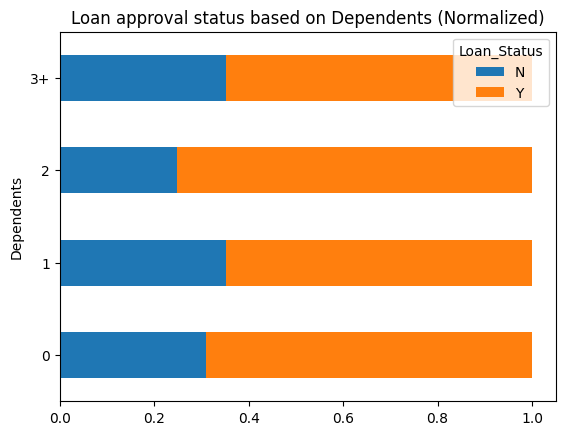

In [ ]:
main_df.groupby('Dependents')['Loan_Status'].value_counts(normalize=True).unstack('Loan_Status').plot.barh(stacked=True)
plt.title('Loan approval status based on Dependents (Normalized)')
plt.yticks(rotation=0)

plt.show()

As observed, there is no particular relation between No.of Dependents and Loan Status

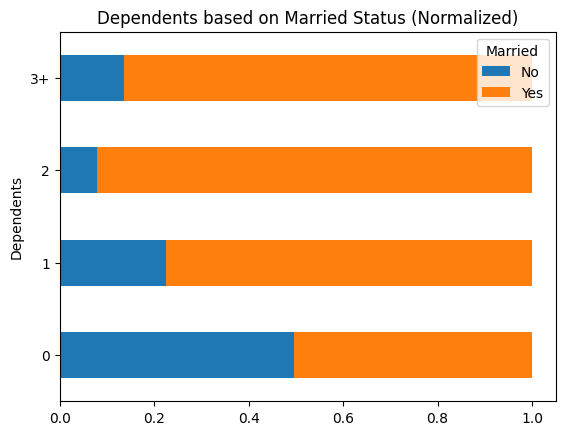

In [ ]:
main_df.groupby('Dependents')['Married'].value_counts(normalize=True).unstack('Married').plot.barh(stacked=True)
plt.title('Dependents based on Married Status (Normalized)')
plt.yticks(rotation=0)

plt.show()

Here from the above we can conlude that, Married applicants have most dependents.

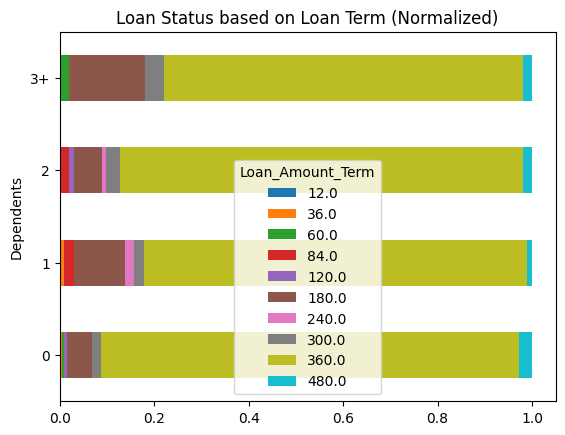

In [ ]:
main_df.groupby('Dependents')['Loan_Amount_Term'].value_counts(normalize=True).unstack('Loan_Amount_Term').plot.barh(stacked=True)
plt.title('Loan Status based on Loan Term (Normalized)')
plt.yticks(rotation=0)

plt.show()

From above if we can observer clearly, Most of the small term loans are taken by applicants having atleast 1 Dependent.
- 36,60,84 months are there in dependents applications.

<ipython-input-20-fa8f2c68637c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = main_df.corr()


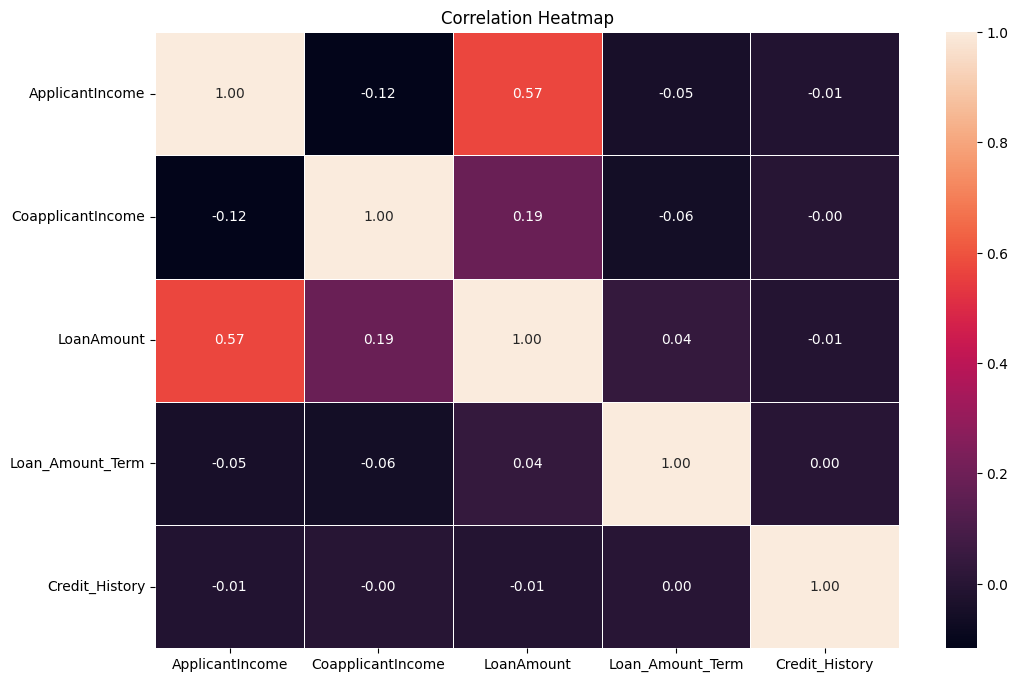

In [ ]:
correlation_matrix = main_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Correlation matrix is drawn between numeric columns, and what we can observe is that there is a large correlation between Applicant Income and Loan Amount about 0.57.

# Handling NULL Values

In [ ]:
main_df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

Married column is a categorical column and as it has only 3 columns as null, Null values are replaced with Mode

In [ ]:
main_df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
main_df[main_df.Married.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [ ]:
main_df['Married'].mode()[0]

'Yes'

In [ ]:
main_df.loc[main_df.Married.isna(),'Married'] = main_df['Married'].mode()[0]

In [ ]:
main_df.Married.isna().sum()

0

Gender as a categorical column has 13 Null values, Null values are replaced with iter random sampling method as this column as no correlation with target or other columns. (each null value is filled saperately)

In [ ]:
main_df.Gender.value_counts() # the count of no.of Male & Female Before filling Null value

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
list1 = main_df[main_df['Gender'].isna()]['Gender'].apply(lambda x: main_df[~ main_df['Gender'].isna()]['Gender'].sample().iloc[0])
list1 = list(list1)
list1

['Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male']

In [ ]:
main_df.loc[main_df['Gender'].isna(),'Gender'] = list1

In [ ]:
main_df.Gender.value_counts()

Male      500
Female    114
Name: Gender, dtype: int64

So, the 13 null values are replaced with both Female and Male. filled using iter random sampling method (each null value is filled saperately)

Self_Employed column has 32 Null Values

In [ ]:
main_df.Self_Employed.value_counts() # value counts Before filling Null values

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
list1 = main_df[main_df['Self_Employed'].isna()]['Self_Employed'].apply(lambda x: main_df[~ main_df['Self_Employed'].isna()]['Self_Employed'].sample().iloc[0])
list1 = list(list1)
list1

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No']

In [ ]:
main_df.loc[main_df['Self_Employed'].isna(),'Self_Employed'] = list1

In [ ]:
main_df.Self_Employed.value_counts()

No     530
Yes     84
Name: Self_Employed, dtype: int64

both No and Yes are filled as Null Values

Credit Histroy has 50 Null values, as we have seen from above EDA 80% of loans who has credit history got approved. SO, we fill the Null values based on it.

In [ ]:
main_df.Credit_History.value_counts() # before filling Null values

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
main_df.loc[(main_df['Credit_History'].isna())&(main_df.Loan_Status == 'Y'),'Credit_History'] = 1.0

In [ ]:
main_df.loc[(main_df['Credit_History'].isna())&(main_df.Loan_Status == 'N'),'Credit_History'] = 0.0

In [ ]:
main_df.Credit_History.value_counts() # After filling Null values

1.0    512
0.0    102
Name: Credit_History, dtype: int64

Those loans which have been approved, we filled Credit_History as 1.0 and vise vera for loans which are not been approved.

In [ ]:
main_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Loan Amount column has 22 null values

In [ ]:
main_df[main_df.LoanAmount.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,0.0,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [ ]:
main_df[main_df.LoanAmount.isna()]['Loan_Amount_Term'].value_counts()

360.0    19
180.0     2
240.0     1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
pivot_table = pd.pivot_table(main_df[main_df.LoanAmount.isna()],values='ApplicantIncome' , index=['Loan_Status', 'Property_Area'], columns='Loan_Amount_Term', aggfunc='count', fill_value=0)

print(pivot_table)

Loan_Amount_Term           180.0  240.0  360.0
Loan_Status Property_Area                     
N           Rural              0      0      3
            Semiurban          0      0      1
            Urban              2      0      5
Y           Rural              0      0      3
            Semiurban          0      1      3
            Urban              0      0      4


In [ ]:
main_df['loan_by_income'] = main_df['LoanAmount']*1000/(main_df['ApplicantIncome']+main_df['CoapplicantIncome'])

pivot_table = pd.pivot_table(main_df[~ main_df.LoanAmount.isna()],values='loan_by_income' , index=['Loan_Status', 'Property_Area'], columns='Loan_Amount_Term', aggfunc='mean', fill_value=0)

print(pivot_table)

Loan_Amount_Term               12.0      36.0       60.0       84.0   \
Loan_Status Property_Area                                              
N           Rural           0.000000   0.00000   0.000000  23.616641   
            Semiurban       0.000000  34.17557   0.000000   0.000000   
            Urban           0.000000   0.00000   0.000000   0.000000   
Y           Rural           0.000000   0.00000   0.000000  25.060912   
            Semiurban       0.000000   0.00000   0.000000  24.769993   
            Urban          14.835605   0.00000  17.745813  29.834254   

Loan_Amount_Term              120.0      180.0      240.0      300.0  \
Loan_Status Property_Area                                              
N           Rural          0.000000  23.560071   0.000000  26.948248   
            Semiurban      0.000000   7.958163  34.166667  22.120319   
            Urban          0.000000  17.252230   0.000000   0.000000   
Y           Rural          0.000000  16.624517   0.000000  16.6

I didn't consider above method, because there are 0 for the rows which we are considering

In [ ]:
pivot_table = pd.pivot_table(main_df[~ main_df.LoanAmount.isna()],values='loan_by_income' , index=['Loan_Status', 'Property_Area'], columns='Loan_Amount_Term', aggfunc='median', fill_value=0)

print(pivot_table)

Loan_Amount_Term               12.0      36.0       60.0       84.0   \
Loan_Status Property_Area                                              
N           Rural           0.000000   0.00000   0.000000  23.616641   
            Semiurban       0.000000  34.17557   0.000000   0.000000   
            Urban           0.000000   0.00000   0.000000   0.000000   
Y           Rural           0.000000   0.00000   0.000000  25.060912   
            Semiurban       0.000000   0.00000   0.000000  24.769993   
            Urban          14.835605   0.00000  17.745813  29.834254   

Loan_Amount_Term              120.0      180.0      240.0      300.0  \
Loan_Status Property_Area                                              
N           Rural          0.000000  25.103771   0.000000  26.948248   
            Semiurban      0.000000   7.958163  34.166667  22.932592   
            Urban          0.000000  15.378706   0.000000   0.000000   
Y           Rural          0.000000  18.185492   0.000000  16.6

In [ ]:
main_df['loan_by_income'].mean()

23.755685859166373

In [ ]:
main_df['LoanAmount'].fillna(((main_df['ApplicantIncome'] + main_df['CoapplicantIncome'])*(23.755685859166373)) / 1000, inplace=True)

In [ ]:
# index_list1 =list(main_df[main_df.LoanAmount.isna()]['Loan_ID'])
index_list1 = ['LP001002',
 'LP001106',
 'LP001213',
 'LP001266',
 'LP001326',
 'LP001350',
 'LP001356',
 'LP001392',
 'LP001449',
 'LP001682',
 'LP001922',
 'LP001990',
 'LP002054',
 'LP002113',
 'LP002243',
 'LP002393',
 'LP002401',
 'LP002533',
 'LP002697',
 'LP002778',
 'LP002784',
 'LP002960']
main_df[main_df['Loan_ID'].isin(index_list1)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_by_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,138.947007,360.0,1.0,Urban,Y,NaN
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,103.147188,360.0,1.0,Urban,Y,NaN
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,117.471867,360.0,0.0,Rural,N,NaN
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,56.894868,360.0,1.0,Semiurban,Y,NaN
95,LP001326,Male,No,0,Graduate,No,6782,0.0,161.111061,360.0,0.0,Urban,N,NaN
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,324.265112,360.0,1.0,Urban,Y,NaN
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,195.628073,360.0,1.0,Semiurban,Y,NaN
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,177.003615,360.0,1.0,Semiurban,Y,NaN
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,130.775051,360.0,1.0,Rural,Y,NaN
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,94.832698,180.0,1.0,Urban,N,NaN


As, We can see that we opted for creating a New column 'Loan_by_income' where Loan Amount is divided with the combined income of Applicant and Coapplicant. To maintain a certain ratio between Income and Loan Amount. We also see that we looked for a pattern between Loan Status approvals and Loan_Amount, Income and their ratios. we conclude that there are other extra considerations like rate of interest, loan term etc, which play a key role in approval of the loan.

Also, We tried KNN (with Neighbours 4) it gave single output which filled all the null values with "146.412162"

Hence, we took average of the 'loan_by_income' column to maintain ratio b/w income and Loan_Amount.

In [ ]:
main_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
loan_by_income       22
dtype: int64

Loan_Amount_Term column has 14 Null values

In [ ]:
# Using Mode for filling NUll values

main_df['Loan_Amount_Term'].fillna(main_df['Loan_Amount_Term'].mode()[0], inplace=True)

Tried Classifier Algorithm, using RandomForestClassifier, SimpleImputer(strategy='most_frequent') Technique and iterating on each Null value, where it is also returning 360. So, replace it with fillna(Mode).

<Axes: ylabel='Loan_Status'>

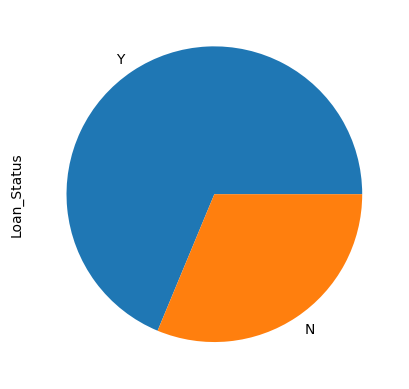

In [ ]:
main_df['Loan_Status'].value_counts(normalize=True).plot.pie()

Dependents are having 15 Null values. Using Random sampling Technique to fill the categorical Independent feature.

In [ ]:
list1 = main_df[main_df['Dependents'].isna()]['Dependents'].apply(lambda x: main_df[~ main_df['Dependents'].isna()]['Dependents'].sample().iloc[0])
list1 = list(list1)
list1

['0', '2', '2', '3+', '2', '0', '1', '3+', '2', '0', '1', '2', '1', '0', '2']

In [ ]:
main_df.loc[main_df['Dependents'].isna(),'Dependents'] = list1

In [ ]:
main_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
loan_by_income       22
dtype: int64

In [ ]:
main_df[main_df.loan_by_income.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_by_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,138.947007,360.0,1.0,Urban,Y,NaN
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,103.147188,360.0,1.0,Urban,Y,NaN
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,117.471867,360.0,0.0,Rural,N,NaN
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,56.894868,360.0,1.0,Semiurban,Y,NaN
95,LP001326,Male,No,0,Graduate,No,6782,0.0,161.111061,360.0,0.0,Urban,N,NaN
102,LP001350,Male,Yes,0,Graduate,No,13650,0.0,324.265112,360.0,1.0,Urban,Y,NaN
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,195.628073,360.0,1.0,Semiurban,Y,NaN
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,177.003615,360.0,1.0,Semiurban,Y,NaN
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,130.775051,360.0,1.0,Rural,Y,NaN
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,94.832698,180.0,1.0,Urban,N,NaN


In [ ]:
main_df['loan_by_income'].fillna(main_df['LoanAmount']*1000/(main_df['ApplicantIncome']+main_df['CoapplicantIncome']), inplace=True)

In [ ]:
main_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loan_by_income       0
dtype: int64

With the above mentioned methods, we replaced the Null values.

#Standization And Normalization of the Columns

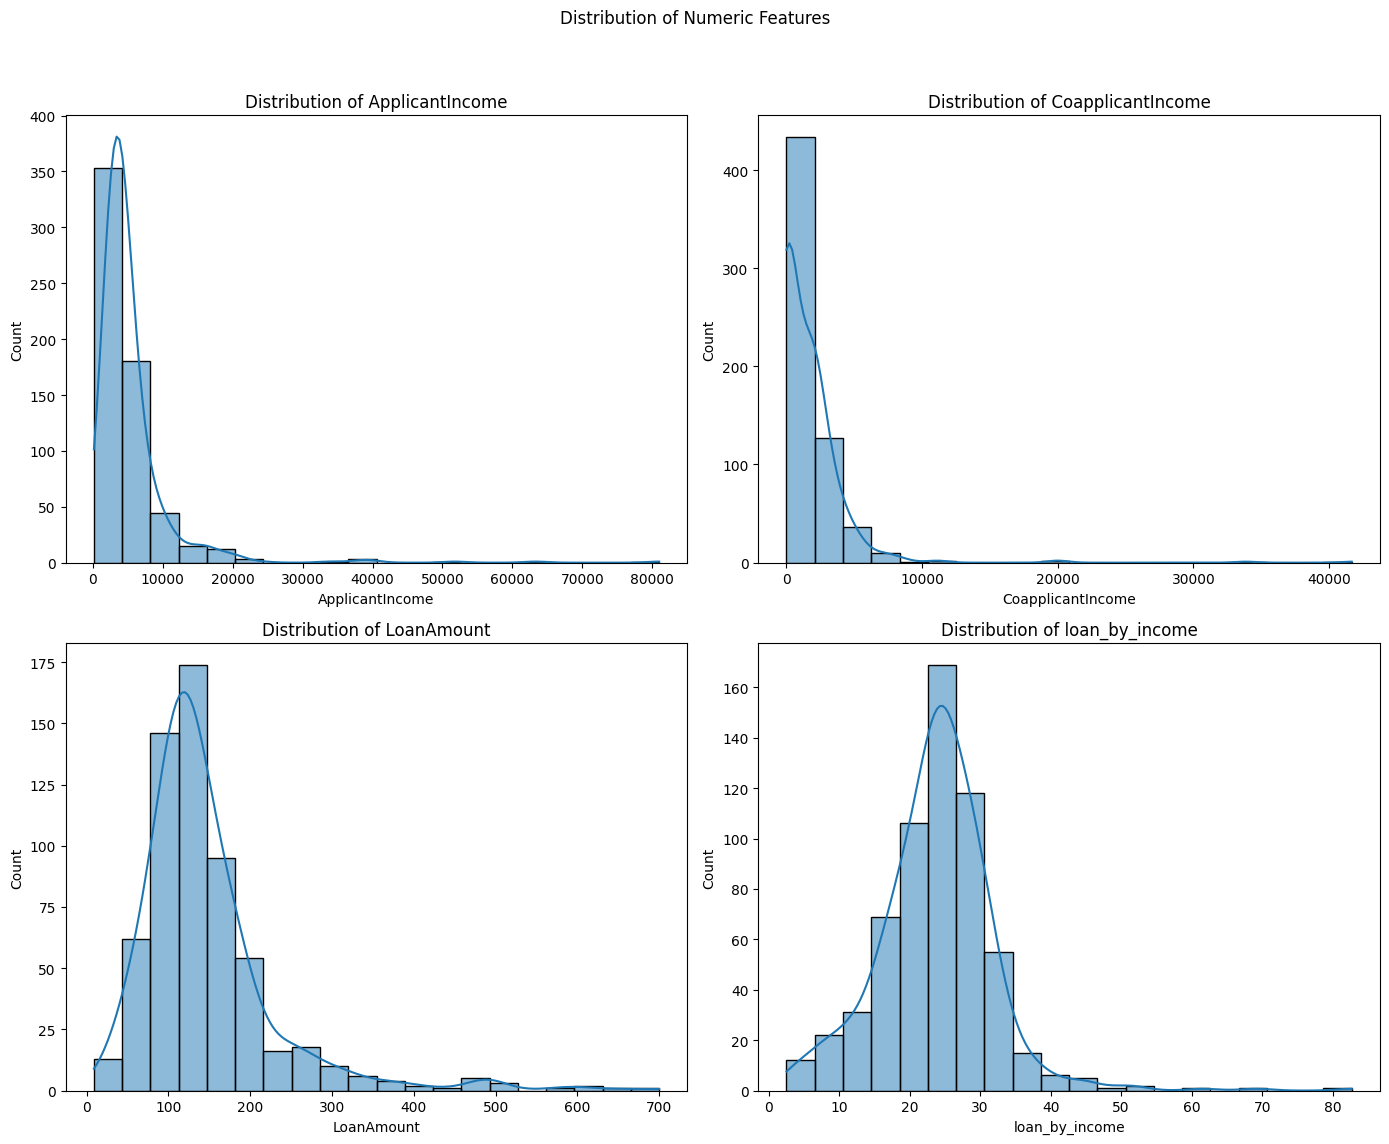

In [ ]:
import seaborn as sns

num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','loan_by_income']
#num_cols = [xtrain,xtest]

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribution of Numeric Features')

for ax, col in zip(axes.flatten(), num_cols):
    sns.histplot(main_df[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


from the above we can see that the columns are rightly skewed

In [ ]:
col1 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','loan_by_income']

for col in col1:
  print(col)
  Q1 = main_df[f'{col}'].quantile(0.25)
  Q3 = main_df[f'{col}'].quantile(0.75)
  IQR = Q3-Q1
  l1 = len(main_df[main_df[f'{col}']<(Q1-1.5*(IQR))])
  l2 = len(main_df[main_df[f'{col}']>(Q3+1.5*(IQR))])
  lower_threshold = Q1 - 1.5 * IQR
  upper_threshold = Q3 + 1.5 * IQR
  main_df[f'{col}'] = main_df[f'{col}'].clip(lower=lower_threshold, upper=upper_threshold)

  print('Q1',Q1,'\nQ2',Q3)
  print('IQR',IQR)
  print('MinWhisker',Q1-1.5*IQR)
  print('MaxWhisker',Q3+1.5*IQR)
  print('lower outliers', l1)
  print('upper outliers',l2)

ApplicantIncome
Q1 2877.5 
Q2 5795.0
IQR 2917.5
MinWhisker -1498.75
MaxWhisker 10171.25
lower outliers 0
upper outliers 50
CoapplicantIncome
Q1 0.0 
Q2 2297.25
IQR 2297.25
MinWhisker -3445.875
MaxWhisker 5743.125
lower outliers 0
upper outliers 18
LoanAmount
Q1 100.0 
Q2 167.75
IQR 67.75
MinWhisker -1.625
MaxWhisker 269.375
lower outliers 0
upper outliers 41
loan_by_income
Q1 19.583558913167654 
Q2 28.030266588333582
IQR 8.446707675165928
MinWhisker 6.913497400418761
MaxWhisker 40.70032810108248
lower outliers 15
upper outliers 13


In [ ]:
main_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'loan_by_income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
features = ['Loan_ID','Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Loan_Status']

for feature in features:
    main_df[feature] = label_encoder.fit_transform(main_df[feature])

In [ ]:
dff=pd.get_dummies(main_df,columns=['Property_Area'])
dff

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,5849.0,0.0,138.947007,360.0,1.0,1,23.755686,0,0,1
1,1,1,1,1,0,0,4583.0,1508.0,128.000000,360.0,1.0,0,21.014612,1,0,0
2,2,1,1,0,0,1,3000.0,0.0,66.000000,360.0,1.0,1,22.000000,0,0,1
3,3,1,1,0,1,0,2583.0,2358.0,120.000000,360.0,1.0,1,24.286582,0,0,1
4,4,1,0,0,0,0,6000.0,0.0,141.000000,360.0,1.0,1,23.500000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900.0,0.0,71.000000,360.0,1.0,1,24.482759,1,0,0
610,610,1,1,3,0,0,4106.0,0.0,40.000000,180.0,1.0,1,9.741841,1,0,0
611,611,1,1,1,0,0,8072.0,240.0,253.000000,360.0,1.0,1,30.437921,0,0,1
612,612,1,1,2,0,0,7583.0,0.0,187.000000,360.0,1.0,1,24.660425,0,0,1


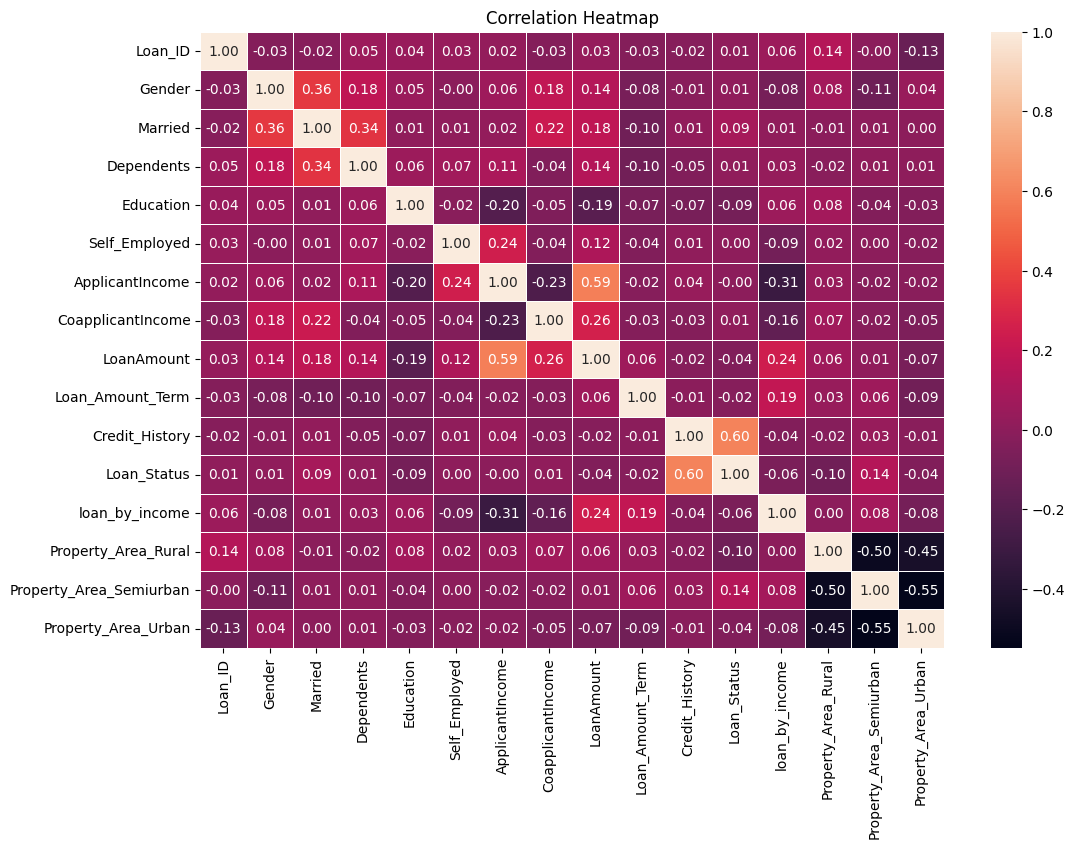

In [ ]:
correlation_matrix = dff.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
dff['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# **LogisticRegression Algorithm**

With Complete Data

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [ ]:
dff.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'loan_by_income',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,0.497164,-0.874587,0.010905,0.273231,1.0,1,0.024799,0,0,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.177668,0.273231,1.0,0,-0.360498,1,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.245676,0.273231,1.0,1,-0.221988,0,0,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.315475,0.273231,1.0,1,0.099424,0,0,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.046269,0.273231,1.0,1,-0.011141,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.692990,-0.874587,-1.159547,0.273231,1.0,1,0.126999,1,0,0
610,610,1,1,3,0,0,-0.206274,-0.874587,-1.693551,-2.522836,1.0,1,-1.945047,1,0,0
611,611,1,1,1,0,0,1.394319,-0.726739,1.975575,0.273231,1.0,1,0.964082,0,0,1
612,612,1,1,2,0,0,1.196969,-0.874587,0.838663,0.273231,1.0,1,0.151973,0,0,1


In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)'''

'from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nxtrain=sc.fit_transform(xtrain)\nxtest=sc.transform(xtest)'

In [ ]:
from sklearn.linear_model import LogisticRegression
li=LogisticRegression()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
li.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
lpre=li.predict(xtest)
lpre

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
li.score(xtest,ytest)*100

77.41935483870968

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
cl=classification_report(ytest,lpre)
print(cl)

              precision    recall  f1-score   support

           0       0.94      0.46      0.62        37
           1       0.73      0.98      0.84        56

    accuracy                           0.77        93
   macro avg       0.84      0.72      0.73        93
weighted avg       0.82      0.77      0.75        93



on complete data

with Standardscaler and gridsearchcv

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15)

In [ ]:
from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,0.497164,-0.874587,0.010905,0.273231,1.0,1,0.024799,0,0,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.177668,0.273231,1.0,0,-0.360498,1,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.245676,0.273231,1.0,1,-0.221988,0,0,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.315475,0.273231,1.0,1,0.099424,0,0,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.046269,0.273231,1.0,1,-0.011141,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.692990,-0.874587,-1.159547,0.273231,1.0,1,0.126999,1,0,0
610,610,1,1,3,0,0,-0.206274,-0.874587,-1.693551,-2.522836,1.0,1,-1.945047,1,0,0
611,611,1,1,1,0,0,1.394319,-0.726739,1.975575,0.273231,1.0,1,0.964082,0,0,1
612,612,1,1,2,0,0,1.196969,-0.874587,0.838663,0.273231,1.0,1,0.151973,0,0,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred1 = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred1, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred1) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")


    elif train==False:
        pred2 = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred2, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytest, pred2) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred2)}\n")

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {
    "penalty": ("l1", "l2","elasticnet","None")

}


tree_clf = LogisticRegression(random_state=45)
tree_cv = GridSearchCV(
    tree_clf,  # Pass the classifier to GridSearchCV
    param_grid=params,
    n_jobs=-1,
)



tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = LogisticRegression(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'penalty': 'l2'})
Train Result:
Accuracy Score: 83.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921348    0.812500  0.831094    0.866924      0.846554
recall       0.503067    0.980447  0.831094    0.741757      0.831094
f1-score     0.650794    0.888608  0.831094    0.769701      0.814205
support    163.000000  358.000000  0.831094  521.000000    521.000000
_______________________________________________
Test Result:
Accuracy Score: 82.80%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   1.000000   0.800000  0.827957   0.900000      0.862366
recall      0.448276   1.000000  0.827957   0.724138      0.827957
f1-score    0.619048   0.888889  0.827957   0.753968      0.804745
support    29.000000  64.000000  0.827957  93.000000     93.000000
_________________

**With Important Features**

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_Status','Gender','Loan_ID','Education'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,0.497164,-0.874587,0.010905,0.273231,1.0,1,0.024799,0,0,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.177668,0.273231,1.0,0,-0.360498,1,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.245676,0.273231,1.0,1,-0.221988,0,0,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.315475,0.273231,1.0,1,0.099424,0,0,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.046269,0.273231,1.0,1,-0.011141,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.692990,-0.874587,-1.159547,0.273231,1.0,1,0.126999,1,0,0
610,610,1,1,3,0,0,-0.206274,-0.874587,-1.693551,-2.522836,1.0,1,-1.945047,1,0,0
611,611,1,1,1,0,0,1.394319,-0.726739,1.975575,0.273231,1.0,1,0.964082,0,0,1
612,612,1,1,2,0,0,1.196969,-0.874587,0.838663,0.273231,1.0,1,0.151973,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {
    "penalty": ("l1", "l2","elasticnet","None")

}


tree_clf = LogisticRegression(random_state=45)
tree_cv = GridSearchCV(
    tree_clf,  # Pass the classifier to GridSearchCV
    param_grid=params,
    n_jobs=-1,
)



tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = LogisticRegression(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'penalty': 'l2'})
Train Result:
Accuracy Score: 84.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927711    0.824201  0.840691    0.875956      0.854797
recall       0.500000    0.983651  0.840691    0.741826      0.840691
f1-score     0.649789    0.896894  0.840691    0.773342      0.823854
support    154.000000  367.000000  0.840691  521.000000    521.000000
_______________________________________________
Test Result:
Accuracy Score: 77.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.729730  0.774194   0.838549      0.818657
recall      0.473684   0.981818  0.774194   0.727751      0.774194
f1-score    0.631579   0.837209  0.774194   0.734394      0.753188
support    38.000000  55.000000  0.774194  93.000000     93.000000
_________________

# **DecisionTreeClassifier Algorithm**

with complete data

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier(max_depth=2,max_leaf_nodes=2)

In [ ]:
d.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2)

In [ ]:
dpr=d.predict(xtest)
dpr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0])

In [ ]:
'''fscores=pd.Series(d.feature_importances_,index=xtrain.columns)
fscores'''

'fscores=pd.Series(d.feature_importances_,index=xtrain.columns)\nfscores'

In [ ]:
d.score(xtest,ytest)*100

77.41935483870968

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
c=classification_report(ytest,dpr)
print(c)

              precision    recall  f1-score   support

           0       0.95      0.47      0.63        38
           1       0.73      0.98      0.84        55

    accuracy                           0.77        93
   macro avg       0.84      0.73      0.73        93
weighted avg       0.82      0.77      0.75        93



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 15))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 15)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Fitting 5 folds for each of 2352 candidates, totalling 11760 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 84.84%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.878788    0.841232  0.848369    0.860010      0.852333
recall       0.564935    0.967302  0.848369    0.766119      0.848369
f1-score     0.687747    0.899873  0.848369    0.793810      0.837172
support    154.000000  367.000000  0.848369  521.000000    521.000000
_______________________________________________
Test Result:
Accuracy Score: 79.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.952381   0.750000  0.795699   0.851190      0.832693
recall      0.526316   0.981818  0.795699   0.754067      0.

with important features

with grid search cv

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_Status','Gender','Loan_ID','Education'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 10)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Best paramters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 84.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.927711    0.824201  0.840691    0.875956      0.854797
recall       0.500000    0.983651  0.840691    0.741826      0.840691
f1-score     0.649789    0.896894  0.840691    0.773342      0.823854
support    154.000000  367.000000  0.840691  521.000000    521.000000
_______________________________________________
Test Result:
Accuracy Score: 77.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.947368   0.729730  0.774194   0.838549      0.818657
recall      0.473684   0.981818  0.774194   0.727751      0.77419

# **RandomForestClassifier**

with complete data

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier()

In [ ]:
feature_names = xtrain.columns
feature_importances = rr.feature_importances_

# Create a DataFrame
df_importances = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})

# Sort the DataFrame by importance
df_importances.sort_values(by="Importance", ascending=False)

,Feature,Importance
9,Credit_History,0.308107
10,loan_by_income,0.157176
5,ApplicantIncome,0.131681
7,LoanAmount,0.127648
6,CoapplicantIncome,0.073201
2,Dependents,0.040688
8,Loan_Amount_Term,0.039137
1,Married,0.024193
3,Education,0.019271
12,Property_Area_Semiurban,0.017901


In [ ]:
rr.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
rp=rr.predict(xtest)
rp

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0])

In [ ]:
rr.score(xtest,ytest)*100

80.64516129032258

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ca=classification_report(ytest,rp)
print(ca)

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.76      0.98      0.86        55

    accuracy                           0.81        93
   macro avg       0.86      0.77      0.78        93
weighted avg       0.84      0.81      0.79        93



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred1 = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred1, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred1) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytrain, pred1)}\n")

    elif train==False:
        pred2 = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred2, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytest, pred2) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred2)}\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(xtrain, ytrain)

print_score(rf_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(rf_clf, xtrain, ytrain, xtest, ytest, train=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300],
    "criterion":['gini'],
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 10)),
}

tree_clf = RandomForestClassifier(random_state=45)
tree_cv = GridSearchCV(estimator=tree_clf, param_grid=params, scoring="f1")

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = RandomForestClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200})
Train Result:
Accuracy Score: 85.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.923077    0.837209  0.852207    0.880143      0.862591
recall       0.545455    0.980926  0.852207    0.763190      0.852207
f1-score     0.685714    0.903388  0.852207    0.794551      0.839047
support    154.000000  367.000000  0.852207  521.000000    521.000000
_______________________________________________
Confusion Matrix: 
 [[ 84  70]
 [  7 360]]

Test Result:
Accuracy Score: 79.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.952381   0.750000  0.795699   0.851190      0.832693
recall      0.526316   0.981818  0.795699   0.754067      0.795699
f1-score    0.67796

with important features

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_Status','Gender','Loan_ID','Education'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100, 200, 300],
    "criterion":['gini'],
    "max_depth":(list(range(1, 10))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 10)),
}

tree_clf1 = RandomForestClassifier(random_state=42)
tree_cv = GridSearchCV(estimator=tree_clf1, param_grid=params, scoring="f1")

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf1 = RandomForestClassifier(**best_params)
tree_clf1.fit(xtrain, ytrain)
print_score(tree_clf1, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf1, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100})
Train Result:
Accuracy Score: 86.56%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.937500    0.849412  0.865643    0.893456      0.875449
recall       0.584416    0.983651  0.865643    0.784033      0.865643
f1-score     0.720000    0.911616  0.865643    0.815808      0.854977
support    154.000000  367.000000  0.865643  521.000000    521.000000
_______________________________________________
Test Result:
Accuracy Score: 80.65%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.954545   0.760563  0.806452   0.857554      0.839825
recall      0.552632   0.981818  0.806452   0.767225      0.806452
f1-score    0.700000   0.857143  0.806452   0.778571      0.792

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
k = KNeighborsClassifier()

In [ ]:
k.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
pred2=k.predict(xtest)

In [ ]:
ac6=accuracy_score(ytest,pred2)*100
print("The accuracy rate for KNeighborsclassifier: ",ac6)

The accuracy rate for KNeighborsclassifier:  70.73170731707317


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy')


tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

knn = KNeighborsClassifier(**best_params)
knn.fit(xtrain, ytrain)
print_score(knn, xtrain, ytrain, xtest, ytest, train=True)
print_score(knn, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'})
Train Result:
Accuracy Score: 82.89%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901235    0.814634  0.828921    0.857934      0.840914
recall       0.489933    0.976608  0.828921    0.733271      0.828921
f1-score     0.634783    0.888298  0.828921    0.761540      0.811366
support    149.000000  342.000000  0.828921  491.000000    491.000000
_______________________________________________
Confusion Matrix: 
 [[ 73  76]
 [  8 334]]

Test Result:
Accuracy Score: 71.54%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   0.785714   0.706422  0.715447    0.746068      0.734142
recall      0.255814   0.962500  0.715447    0.609157      0.715447
f1-score    0.385965   0.814815  0.715447    0.600390      0.664892
suppo

with important feacutres

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_Status','Gender','Loan_ID','Education'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy')


tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

knn = KNeighborsClassifier(**best_params)
knn.fit(xtrain, ytrain)
print_score(knn, xtrain, ytrain, xtest, ytest, train=True)
print_score(knn, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    154.0  367.0       1.0      521.0         521.0
_______________________________________________
Confusion Matrix: 
 [[154   0]
 [  0 367]]

Test Result:
Accuracy Score: 66.67%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.888889   0.642857  0.666667   0.765873      0.743386
recall      0.210526   0.981818  0.666667   0.596172      0.666667
f1-score    0.340426   0.776978  0.666667   0.558702      0.598602
support    38.000000  55.000000  0.666667  93.000000     93.00

# **LogisticRegression Algorithm**

with balancing the target variable

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
dff["Loan_Status"].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [ ]:
ytrain.value_counts()

1    367
0    367
Name: Loan_Status, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,0.497164,-0.874587,0.010905,0.273231,1.0,1,0.024799,0,0,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.177668,0.273231,1.0,0,-0.360498,1,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.245676,0.273231,1.0,1,-0.221988,0,0,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.315475,0.273231,1.0,1,0.099424,0,0,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.046269,0.273231,1.0,1,-0.011141,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.692990,-0.874587,-1.159547,0.273231,1.0,1,0.126999,1,0,0
610,610,1,1,3,0,0,-0.206274,-0.874587,-1.693551,-2.522836,1.0,1,-1.945047,1,0,0
611,611,1,1,1,0,0,1.394319,-0.726739,1.975575,0.273231,1.0,1,0.964082,0,0,1
612,612,1,1,2,0,0,1.196969,-0.874587,0.838663,0.273231,1.0,1,0.151973,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {
    "penalty": ("l1", "l2","elasticnet","None")

}


tree_clf = LogisticRegression()
tree_cv = GridSearchCV(
    tree_clf,  # Pass the classifier to GridSearchCV
    param_grid=params,
    n_jobs=-1,
)



tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = LogisticRegression(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'penalty': 'l2'})
Train Result:
Accuracy Score: 80.93%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.864952    0.768322  0.809264    0.816637      0.816637
recall       0.732970    0.885559  0.809264    0.809264      0.809264
f1-score     0.793510    0.822785  0.809264    0.808148      0.808148
support    367.000000  367.000000  0.809264  734.000000    734.000000
_______________________________________________
Confusion Matrix: 
 [[269  98]
 [ 42 325]]

Test Result:
Accuracy Score: 76.34%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.833333   0.739130  0.763441   0.786232      0.777622
recall      0.526316   0.927273  0.763441   0.726794      0.763441
f1-score    0.645161   0.822581  0.763441   0.733871      0.750087
support    38.000000  55.000000  0.76344

In [ ]:
ytrain.shape

In [ ]:
ytest.shape

# **DecisionTreeClassifier Algorithm**

with balancing the data

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
ytrain.value_counts()

1    367
0    154
Name: Loan_Status, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [ ]:
ytrain.value_counts()

1    367
0    367
Name: Loan_Status, dtype: int64

In [ ]:
'''from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff'''

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")


    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 15))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 15)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)


Fitting 5 folds for each of 2352 candidates, totalling 11760 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 11, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 86.38%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.867769    0.859838   0.86376    0.863803      0.863803
recall       0.858311    0.869210   0.86376    0.863760      0.863760
f1-score     0.863014    0.864499   0.86376    0.863756      0.863756
support    367.000000  367.000000   0.86376  734.000000    734.000000
_______________________________________________
Test Result:
Accuracy Score: 77.42%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.774194   0.774194  0.774194   0.774194      0.774194
recall      0.631579   0.872727  0.774194   0.752153      0.7

# **RandomForestClassifier**

with balancing data

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=40)

In [ ]:
ytrain.value_counts()

1    346
0    175
Name: Loan_Status, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='auto')
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [ ]:
ytrain.value_counts()

0    346
1    346
Name: Loan_Status, dtype: int64

In [ ]:
'''from sklearn.preprocessing import StandardScaler
dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]]=StandardScaler().fit_transform(dff[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","loan_by_income"]])
dff'''

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,loan_by_income,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0,0,0,0,0.497164,-0.874587,0.010905,0.273231,1.0,1,0.024799,0,0,1
1,1,1,1,1,0,0,-0.013767,0.054395,-0.177668,0.273231,1.0,0,-0.360498,1,0,0
2,2,1,1,0,0,1,-0.652632,-0.874587,-1.245676,0.273231,1.0,1,-0.221988,0,0,1
3,3,1,1,0,1,0,-0.820924,0.578025,-0.315475,0.273231,1.0,1,0.099424,0,0,1
4,4,1,0,0,0,0,0.558104,-0.874587,0.046269,0.273231,1.0,1,-0.011141,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,-0.692990,-0.874587,-1.159547,0.273231,1.0,1,0.126999,1,0,0
610,610,1,1,3,0,0,-0.206274,-0.874587,-1.693551,-2.522836,1.0,1,-1.945047,1,0,0
611,611,1,1,1,0,0,1.394319,-0.726739,1.975575,0.273231,1.0,1,0.964082,0,0,1
612,612,1,1,2,0,0,1.196969,-0.874587,0.838663,0.273231,1.0,1,0.151973,0,0,1


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, xtrain, ytrain, xtest, ytest, train=True):
    if train:
        pred = clf.predict(xtrain)
        clf_report = pd.DataFrame(classification_report(ytrain, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytrain, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")


    elif train==False:
        pred = clf.predict(xtest)
        clf_report = pd.DataFrame(classification_report(ytest, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(ytest, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(ytest, pred)}\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators":[100,200],
    "criterion":['gini'],
    "max_depth":(list(range(1, 15))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 15)),
}


tree_clf = RandomForestClassifier(random_state=45,)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="f1",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = RandomForestClassifier(**best_params)
tree_clf.fit(xtrain, ytrain)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=True)
print_score(tree_clf, xtrain, ytrain, xtest, ytest, train=False)

Fitting 5 folds for each of 1176 candidates, totalling 5880 fits
Best paramters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    367.0  367.0       1.0      734.0         734.0
_______________________________________________
Test Result:
Accuracy Score: 82.80%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.923077   0.791045  0.827957   0.857061      0.844993
recall      0.631579   0.963636  0.827957   0.797608      0.827957
f1-score    0.750000   0.868852  0.827957   0.80942

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x=dff.drop(['Loan_ID','Loan_Status','Gender'],axis=1)
y=dff['Loan_Status']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=42)

In [ ]:
smote = SMOTE(sampling_strategy='auto')
xtrain,ytrain=smote.fit_resample(xtrain,ytrain)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()
tree_cv = GridSearchCV(estimator=knn, param_grid=params, cv=5, scoring='accuracy')


tree_cv.fit(xtrain, ytrain)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

knn = KNeighborsClassifier(**best_params)
knn.fit(xtrain, ytrain)
print_score(knn, xtrain, ytrain, xtest, ytest, train=True)
print_score(knn, xtrain, ytrain, xtest, ytest, train=False)

Best paramters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    367.0  367.0       1.0      734.0         734.0
_______________________________________________
Test Result:
Accuracy Score: 68.82%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.645161   0.709677  0.688172   0.677419      0.683316
recall      0.526316   0.800000  0.688172   0.663158      0.688172
f1-score    0.579710   0.752137  0.688172   0.665923      0.681683
support    38.000000  55.000000  0.688172  93.000000     93.000000
_______________________________________